In [ ]:

#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/Book2.csv", delimiter=';')

In [ ]:
df.head()

,Tanggal,IDR,SBI,CPI,EXP,IMP,M2,OECD,GPM,TLKM
0,2020-05-01,14575.0,4.50,3.718,10736197967,9088168344,1.262111e+11,98.45,-32.733629,3.15
1,2020-04-01,14825.0,4.50,3.824,12354195223,12230446623,1.235632e+11,99.08,-17.573075,3.50
2,2020-03-01,16300.0,4.50,3.430,13679902374,12957009839,1.168747e+11,100.12,-1.423400,3.16
3,2020-02-01,14340.0,4.75,3.906,15161518751,12908365959,1.263023e+11,100.89,2.779785,3.49
4,2020-01-01,13650.0,5.00,4.159,14260110167,13673913951,1.277356e+11,101.34,1.054202,3.80


In [ ]:
df.describe()

,IDR,SBI,CPI,EXP,IMP,M2,OECD,GPM,TLKM
count,125.000000,125.00000,125.000000,1.250000e+02,1.250000e+02,1.250000e+02,125.00000,125.000000,125.000000
mean,11932.900000,6.10600,4.672208,1.430274e+10,1.377527e+10,1.074317e+11,100.79864,4.010712,2.861920
std,2167.881475,1.05124,1.622662,1.724591e+09,1.883408e+09,1.360395e+10,0.59258,5.114610,1.030039
min,8495.000000,4.25000,2.033000,9.494174e+09,9.088168e+09,6.700431e+10,98.45000,-32.733629,1.373000
25%,9530.000000,5.25000,3.331000,1.329294e+10,1.214018e+10,1.014515e+11,100.45000,2.417661,1.845000
50%,12960.000000,6.00000,4.295000,1.442238e+10,1.417570e+10,1.080467e+11,100.85000,4.458260,2.845000
75%,13740.000000,6.75000,6.159000,1.551737e+10,1.527287e+10,1.174246e+11,101.33000,6.468762,3.850000
max,16300.000000,7.75000,8.359000,1.839742e+10,1.685767e+10,1.284982e+11,101.74000,12.963330,4.690000


In [ ]:
df.shape

(125, 10)

In [ ]:
df.isna().sum() # digunakan untuk mencari missing value

Tanggal    0
IDR        0
SBI        0
CPI        0
EXP        0
IMP        0
M2         0
OECD       0
GPM        0
TLKM       0
dtype: int64

In [ ]:
target_feature = 'IDR'

date = 'Tanggal'

#membedakan object dengan target fitur
y = df[target_feature]

X = df.drop('IDR', axis=1)
X = X.drop('Tanggal', axis=1)



In [ ]:
names = X.columns
names

Index(['SBI', 'CPI', 'EXP', 'IMP', 'M2', 'OECD', 'GPM', 'TLKM'], dtype='object')

In [ ]:
X.head()

,SBI,CPI,EXP,IMP,M2,OECD,GPM,TLKM
0,4.50,3.718,10736197967,9088168344,1.262111e+11,98.45,-32.733629,3.15
1,4.50,3.824,12354195223,12230446623,1.235632e+11,99.08,-17.573075,3.50
2,4.50,3.430,13679902374,12957009839,1.168747e+11,100.12,-1.423400,3.16
3,4.75,3.906,15161518751,12908365959,1.263023e+11,100.89,2.779785,3.49
4,5.00,4.159,14260110167,13673913951,1.277356e+11,101.34,1.054202,3.80


In [ ]:
y.head()

0    14575.0
1    14825.0
2    16300.0
3    14340.0
4    13650.0
Name: IDR, dtype: float64

In [ ]:
# pemisahan data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# KONVERSI x_train dan x_test KE PANDAS DATAFRAME SEBELUM STANDARISASI
x_train = pd.DataFrame(x_train, columns=X.columns)
x_test = pd.DataFrame(x_test, columns=X.columns)

# Sekarang lakukan standarisasi
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
y_scaler = StandardScaler() # Buat scaler baru untuk y
y_train = pd.Series(y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel())
y_test = pd.Series(y_scaler.transform(y_test.values.reshape(-1, 1)).ravel())


In [ ]:
# Train the model manual
lasso = Lasso(alpha = 0.0081)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0081)

In [ ]:
lr_y_pred = lasso.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,lr_y_pred)
print("r_2 score",score)

r_2 score 0.8661700575494501


In [ ]:
## train score
train_score = lasso.score(x_train,y_train)
print('Train score dari regressi LASSO adalah:',train_score)

Train score dari regressi LASSO adalah: 0.8518304170568708


In [ ]:
print(lasso.intercept_)
#lasso.intercept_

-5.4725616140510205e-15


In [ ]:
#lasso.coef_
print(lasso.coef_)

[ 0.30189684 -0.02932282 -0.10829792  0.18296111  0.12256835 -0.19390053
 -0.11880048  1.04551419]


In [ ]:
#manual
lasso_coefficient = pd.DataFrame()
lasso_coefficient["Columns"]= x_train.columns
print("coefficient ketika alpha=0.5: \n", lasso_coefficient) #<---- jalan kan ini bila manual
lasso_coefficient['Coefficient Estimate'] = pd.Series(lasso.coef_) #<---- jalan kan ini bila manual

coefficient ketika alpha=0.5: 
   Columns
0     SBI
1     CPI
2     EXP
3     IMP
4      M2
5    OECD
6     GPM
7    TLKM


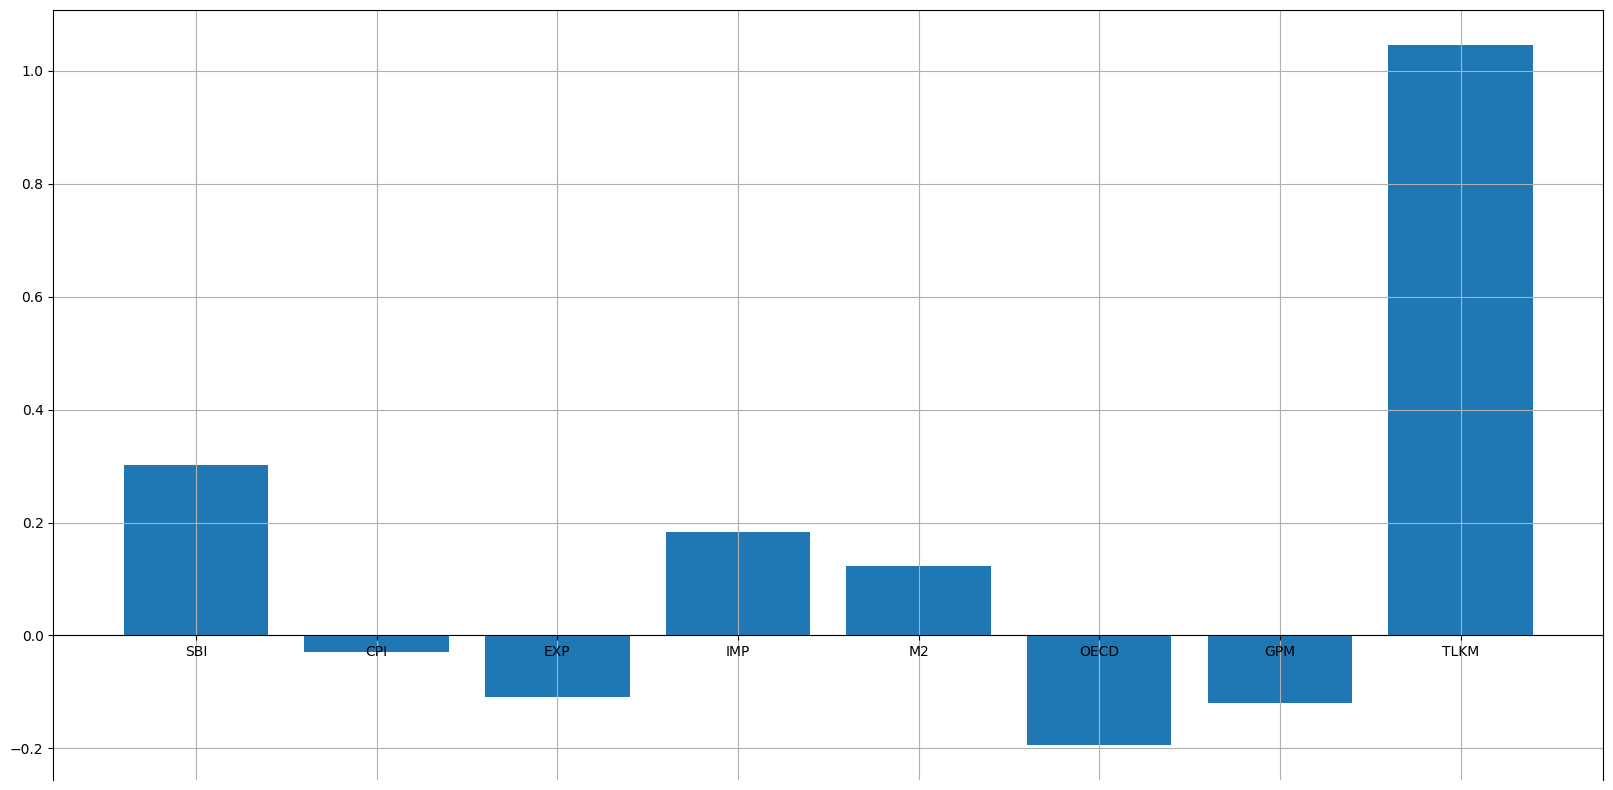

In [ ]:
#plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

ax.bar(lasso_coefficient["Columns"],
lasso_coefficient['Coefficient Estimate'])

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.grid()
plt.show()

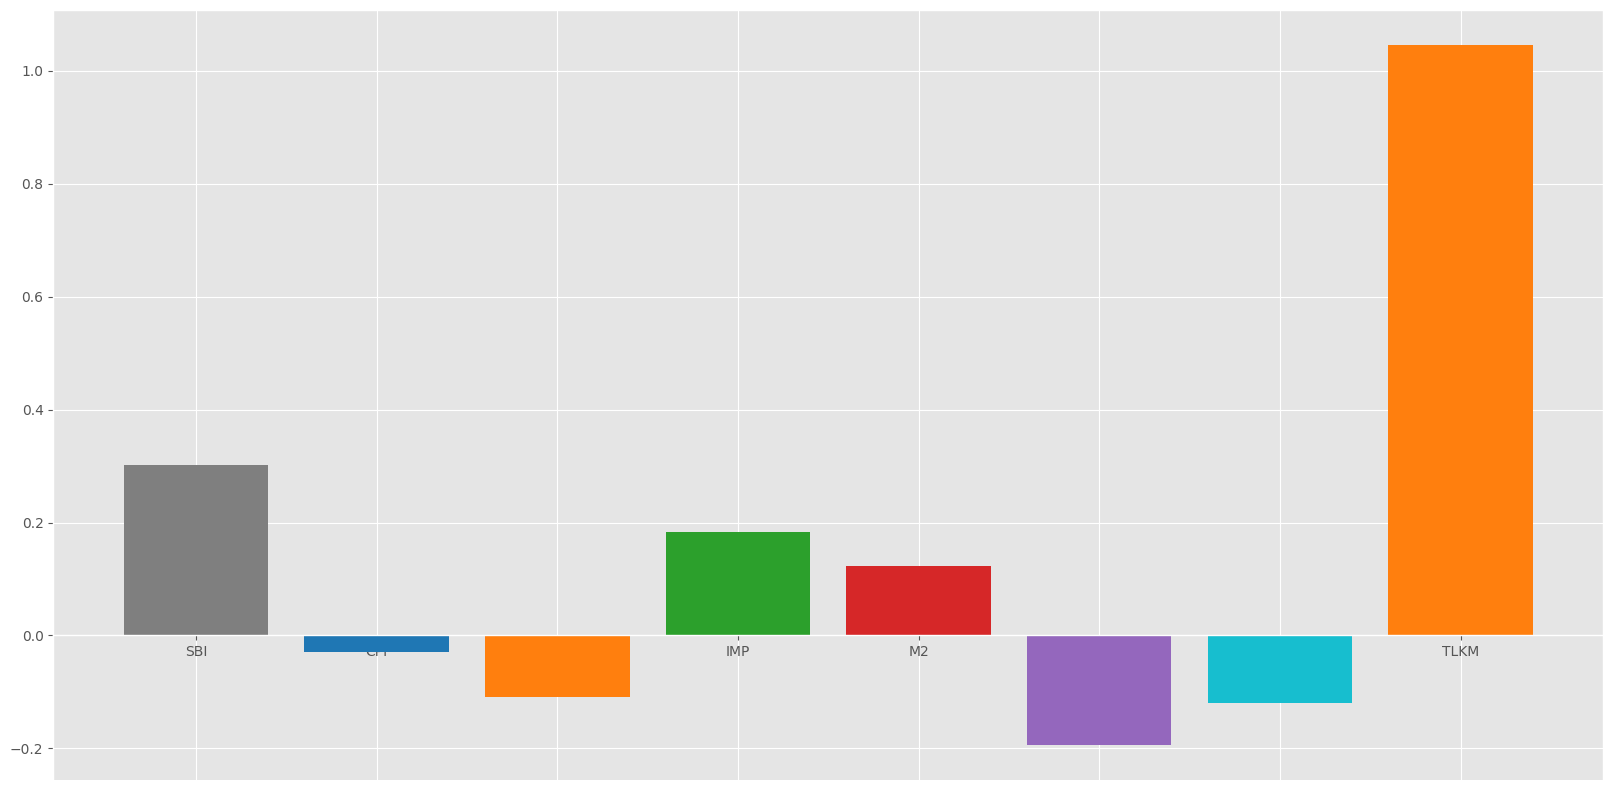

In [ ]:
#ploting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lasso_coefficient["Columns"],
       lasso_coefficient['Coefficient Estimate'], color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()